In [34]:
"""
#HYPERPARAMETER SPHERE FUNCTION IN 2 DIMENSIONS
Lb = -5.12
Ub = +5.12
DIM = 2
POPULATION_SIZE = 50
alpha = 0.08
beta0 = 0.05
gamma = 0.0005
theta = 0.004
MAX_VALUTAZIONI_FITNESS = 100000

Lb = -0.000001
Ub = +0.000001
DIM = 2
POPULATION_SIZE = 50
alpha = 0.08
beta0 = 0.05
gamma = 0.0005
theta = 0.004
MAX_VALUTAZIONI_FITNESS = 100000



#HYPERPARAMETER SPHERE FUNCTION IN 10 DIMENSIONS
Lb = -5.12
Ub = +5.12
DIM = 10
POPULATION_SIZE = 50
alpha = 0.08
beta0 = 0.05
gamma = 0.0005
theta = 0.004
MAX_VALUTAZIONI_FITNESS = 100000





#HYPERPARAMETER ACKLEY FUNCTION IN 2 DIMENSIONS
Lb = -32.768
Ub = +32.768
DIM = 2
POPULATION_SIZE = 30
alpha = 0.01
beta0 = 1
gamma = 0.001
theta = 0.0095
MAX_VALUTAZIONI_FITNESS = 100000


#HYPERPARAMETER ACKLEY FUNCTION IN 10 DIMENSIONS
Lb = -32.768
Ub = +32.768
DIM = 10
POPULATION_SIZE = 30
alpha = 0.1
beta0 = 1
gamma = 50
theta = 0.95
MAX_VALUTAZIONI_FITNESS = 100000





#HYPERPARAMETER RASTINGIN FUNCTION IN 2 DIMENSIONS
Lb = -5.12
Ub = +5.12
DIM = 2
POPULATION_SIZE = 30  # numero di lucciole
alpha = 0.01
beta0 = 1
gamma = 0.1
theta = 0.095
MAX_VALUTAZIONI_FITNESS = 100000


#HYPERPARAMETER RASTINGIN FUNCTION IN 10 DIMENSIONS
Lb = -5.12
Ub = +5.12
DIM = 10
POPULATION_SIZE = 5  # numero di lucciole
alpha = 0.1
beta0 = 1
gamma = 0.001
theta = 0.095
MAX_VALUTAZIONI_FITNESS = 100000




#HYPERPARAMETER ROSENBROCK FUNCTION IN 2 DIMENSIONS
Lb = -2.048
Ub = +2.048
DIM = 2
POPULATION_SIZE = 10
alpha = 0.1
beta0 = 0.025
gamma = 0.0009
theta = 0.01
MAX_VALUTAZIONI_FITNESS = 100000


#HYPERPARAMETER ROSENBROCK FUNCTION IN 10 DIMENSIONS
Lb = -5
Ub = +5
DIM = 10
POPULATION_SIZE = 30  # numero di lucciole
alpha = 0.001
beta0 = 1.4
gamma = 0.004
theta = 0.97
MAX_VALUTAZIONI_FITNESS = 100000




#HYPERPARAMETER HEGGHOLDER FUNCTION IN 2 DIMENSIONS
Lb = -512
Ub = +512
DIM = 2
POPULATION_SIZE = 70
alpha = 1.7
beta0 = 0.00001
gamma = 0.7
theta = 0.0095
MAX_VALUTAZIONI_FITNESS = 100000



#HYPERPARAMETER SHUBERT FUNCTION IN 2 DIMENSIONS
Lb = -5.12
Ub = +5.12
DIM = 2
POPULATION_SIZE = 50
alpha = 2
beta0 = 0.01
gamma = 0.7
theta = 0.095
MAX_VALUTAZIONI_FITNESS = 100000



#HYPERPARAMETER CAMEL FUNCTION IN 2 DIMENSIONS
Lb = -5
Ub = +5
DIM = 2
POPULATION_SIZE = 50
alpha = 2
beta0 = 0.01
gamma = 0.7
theta = 0.095
MAX_VALUTAZIONI_FITNESS = 100000


#HYPERPARAMETER EASOM FUNCTION IN 2 DIMENSIONS
Lb = -10
Ub = +10
DIM = 2
POPULATION_SIZE = 30
alpha = 0.099
beta0 = 0.001
gamma = 0.00001
theta = 0.70
MAX_VALUTAZIONI_FITNESS = 100000



#HYPERPARAMETER DROPWAVE FUNCTION IN 2 DIMENSIONS
Lb = -0.0012
Ub = +0.0012
DIM = 2
POPULATION_SIZE = 20
alpha = 0.099
beta0 = 0.001
gamma = 0.00001
theta = 0.70
MAX_VALUTAZIONI_FITNESS = 100000


#HYPERPARAMETER ROSENBROCK FUNCTION IN 2 DIMENSIONS
Lb = -2.048
Ub = +2.048
DIM = 3
POPULATION_SIZE = 20
alpha = 0.1
beta0 = 1
gamma = 0.009
theta = 0.0999
MAX_VALUTAZIONI_FITNESS = 100000
"""


from deap import base
from deap import creator
from deap import tools
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
from Benchmark_functions import *


#HYPERPARAMETER SPHERE FUNCTION IN 2 DIMENSIONS
#You can select theme 
Lb = -5.12
Ub = +5.12
DIM = 2
POPULATION_SIZE = 50
alpha = 0.08
beta0 = 0.05
gamma = 0.0005
theta = 0.004
MAX_VALUTAZIONI_FITNESS = 100000


toolbox = base.Toolbox()

# reate an operator that returns a random number between Lb and Ub
toolbox.register("Casualnumber", random.uniform, Lb, Ub)


creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# each instance of the Individual class will have an ATTRIBUTE called fitness, of the FitnessMin class we have defined abov
creator.create("Individual", list, fitness=creator.FitnessMin)

# create the individualCreator operator to fill the Individual instance above
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.Casualnumber,DIM)  # creiamo l'individuo

# instantiate the operator to create the population
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

#add the fitness function to the toolbox
toolbox.register("evaluate", Shpere_2)


def update(population,copia,j):  # we are considering a firefly_i and a firefly_j, and the goal is to update the position of the firefly i
    scale = Ub - Lb
    r = 0
    for k in range(DIM):
        r += (copia[k] - population[j][k]) ** 2
    beta = beta0 * math.exp(-gamma * r)
    for k in range(DIM):  # k defines the size me
        steps = (alpha * theta) * (random.random() - 0.5)*scale
        copia[k] = copia[k] + beta * (population[j][k] - copia[k]) + steps  # questa è la posizione aggiornata
    return copia  # I return the new coordinates

toolbox.register("newposition", update)




def main():
    # create our population of n fireflies
    population = toolbox.populationCreator(n=POPULATION_SIZE)

   
    # evaluate fitness for each individual
    fitnesses = list(map(toolbox.evaluate, population))
    for individual, fit in zip(population, fitnesses):
        individual.fitness.values = fit  # tupla
    # extract the fitness value (because fit is a tuple with only one element)
    fits = [individual.fitness.values[0] for individual in population]

    #this list will contain, at each iteration, the average of the fitness values
    meanFitnessValues = []
    minFitnessValues = []

    
    # is used to take into account generations, and fitness ratings.
    gen = 0 #Even if the stop condition is the number of fitness assessments, we still count generations
    contatore_fitness=POPULATION_SIZE

    while contatore_fitness < MAX_VALUTAZIONI_FITNESS:

        
        for i in range(POPULATION_SIZE):
            for j in range(POPULATION_SIZE):
                if (population[i].fitness.values[0] > population[j].fitness.values[0] and i != j):
                    copia_individuo = toolbox.clone(population[i]) #cope the individual, and it is on copy_individual that I will update the position
                    copia_individuo = toolbox.newposition(population,copia_individuo,j) #I have updated the coordinates of the copy of the new individual
                    fitness_copia = toolbox.evaluate(copia_individuo) #I calculated the fitness of the new individual's copy
                    contatore_fitness +=1 #update the fitness counter
                    if fitness_copia[0] < population[i].fitness.values[0]: # if the fitness calculated at the new position is less than the initial one:
                        population[i]= copia_individuo # update the position
                        population[i].fitness.values = fitness_copia #update the fitnes
        fitnessValues = [ind.fitness.values[0] for ind in population] #are all fitness values of the i-th generation

        gen+=1
        #print("GENERATION: ",gen)
        #print("POPULATION: ",population) #I print the current population
        #print("FITNESS VALUES: ",fitnessValues) #print current fitness values
        meanFitness = sum(fitnessValues) / len(population) #I calculate the average of the fitness values
        minimum = min(fitnessValues)
        #print("MEAN FITNESS VALUES",meanFitness)
        #print("\n")
        meanFitnessValues.append(meanFitness) #I add the average fitness value to the meanFitnessValues list
        minFitnessValues.append(minimum)
        

    #plt.plot(minFitnessValues, color='red', label="Min Fitness")
    fig, ax = plt.subplots(figsize=(13,9)) 
    ax.plot(meanFitnessValues, color='green', label="Mean Fitness")
    ax.plot(minFitnessValues,  color='red', label="Best Fitness")

    ax.set_xlabel('GENERATIONS',fontsize=20)
    ax.set_ylabel('FITNESS VALUE',fontsize=20)
    ax.set_title('FITNESS OVER GENERATIONS, SPHERE 2D',fontsize=20,fontweight="bold")
    ax.axhline(0, linestyle='--', color='black', label= "real minima value")
    ax.legend(loc="best")
    plt.show()

    print("\nFINAL RESULTS:\n")
    best_index = fitnessValues.index(min(fitnessValues))
    print("BEST FIREFLY = ", *population[best_index],"\n")
    print("BEST FITNESS =  ",min(fitnessValues),"\n")
    


    

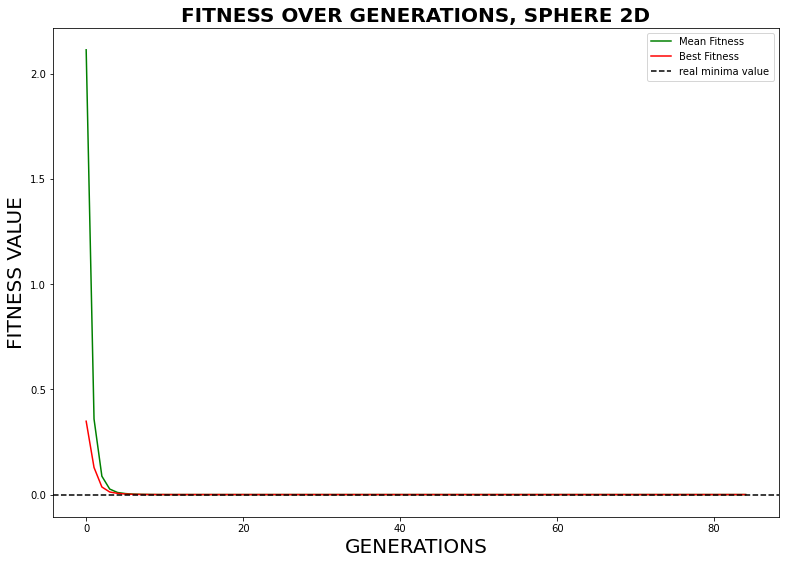


FINAL RESULTS:

BEST FIREFLY =  1.508235554451673e-06 1.9951123487075504e-06 

BEST FITNESS =   6.2552477716775034e-12 



In [35]:
for i in range(1):
    if __name__ == '__main__':
        main()